## Milan Airbnb Recommender
By: Anat Jacobson

Import Relevant Data to Look into
http://insideairbnb.com/get-the-data

Referencing a lot of work done by: Alex Gastone

- https://github.com/alexgastone/AirbnbRecommend/blob/master/Airbnb_CollabFiltering.ipynb. (Will be changing code more as continuing to iterate)
- https://medium.com/@alexandra.gg150/how-to-build-a-recommender-system-for-airbnb-in-python-3a92ad500fa5

Pkg info and other resources looking into: 
- https://towardsdatascience.com/4-python-libraries-to-detect-english-and-non-english-language-c82ad3efd430
- https://pypi.org/project/langdetect/
- https://pypi.org/project/google-trans-new/
- https://stackoverflow.com/questions/43146528/how-to-extract-all-the-emojis-from-text
- https://pypi.org/project/emoji/
- https://www.pauldesalvo.com/extract-emojis-from-python-strings-and-chart-frequency-using-spacy-pandas-and-plotly/
- https://wellsr.com/python/convert-text-to-emojis-and-vice-versa-in-python/#:~:text=To%20convert%20emojis%20in%20the,token%20with%20the%20corresponding%20text.
- https://stackoverflow.com/questions/73108683/getting-error-cannot-import-name-unicode-emoji-from-emoji-unicode-codes
- https://wellsr.com/python/convert-text-to-emojis-and-vice-versa-in-python/#:~:text=To%20convert%20emojis%20in%20the,token%20with%20the%20corresponding%20text.

In [2]:
#import necessary downloads

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

!pip install langdetect
from langdetect import detect


import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from sklearn.feature_extraction.text import TfidfVectorizer


import re


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anatjacobson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Function that could be used at later point  - need to update for the bin

In [3]:

def get_polarity(reviews):

  analyzer = SentimentIntensityAnalyzer()
  polarity_compound = lambda s: (analyzer.polarity_scores(s))['compound']
    #switch to positive? 
  reviews['polarity'] = english_reviews.comments.map(polarity_compound)
  
  return reviews

In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
reviews = pd.read_csv('reviews-2.csv')

In [7]:
#checking the shape of the dataframe
print('reviews shape: ', reviews.shape)

#checking the first 5 rows of the dataframe 
display(reviews.head())


reviews shape:  (611804, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6400,36772,2010-04-19,94463,Hyun,I had such a great stay at 'the studio.' Fran...
1,6400,227727,2011-04-16,415910,Tej,Staying at Francesca's and Alberto's place was...
2,6400,1162608,2012-04-22,415910,Tej,This is my second time staying with Francesca ...
3,6400,11670681,2014-04-11,8464658,Isabelle,"Ein wunderbares Zimmer mit privatem Bad/ WC, a..."
4,6400,11780336,2014-04-14,5427294,Hatice,"I was lucky so I have stayed with Francesca, A..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611804 entries, 0 to 611803
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     611804 non-null  int64 
 1   id             611804 non-null  int64 
 2   date           611804 non-null  object
 3   reviewer_id    611804 non-null  int64 
 4   reviewer_name  611804 non-null  object
 5   comments       611777 non-null  object
dtypes: int64(3), object(3)
memory usage: 28.0+ MB


None

In [10]:
#Running a count on the number of reviews
reviews['reviewer_id'].count()

611777

In [11]:
#showing a count of the number of unique reviewers
reviews['reviewer_id'].nunique()

547706

Checking out how many nulls we have. We mostly care about null comments since we will need to remove those. 

In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611777 entries, 0 to 611803
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     611777 non-null  int64 
 1   id             611777 non-null  int64 
 2   date           611777 non-null  object
 3   reviewer_id    611777 non-null  int64 
 4   reviewer_name  611777 non-null  object
 5   comments       611777 non-null  object
dtypes: int64(3), object(3)
memory usage: 32.7+ MB


Not bad! We are going to drop rows with null comments now since a null comment is useless for our recommendation system. 

In [8]:
reviews = reviews.dropna()

Doing a groupby below to check how many reviews a given reviewer gives and checking the top 50 sorting from greatest to least. The reason I am doing this preliminary analysis is to see if there is enough data to run this recommendation system on for it to be statistically significant. If for example there were only 10 people who gave more than 1 review, this would be too small of a dataset to work with. 

In [9]:
#running the groupby
reviews.groupby('reviewer_id').count().sort_values('reviewer_name', ascending = False).head(50)

,listing_id,id,date,reviewer_name,comments
reviewer_id,,,,,
21546831,55,55,55,55,55
4458363,54,54,54,54,54
41371840,44,44,44,44,44
31058107,42,42,42,42,42
26149575,38,38,38,38,38
65479491,37,37,37,37,37
432993993,36,36,36,36,36
90675773,34,34,34,34,34
257621892,32,32,32,32,32


In [13]:
#saving this as its own df to continue analysis
group_df = reviews.groupby('reviewer_id').count()

In [14]:
#checking for all individuals that have more than 4 reviews. The more users the better!
group_df.loc[group_df['reviewer_name'] > 4] 

,listing_id,id,date,reviewer_name,comments
reviewer_id,,,,,
30054,6,6,6,6,6
31333,5,5,5,5,5
51871,7,7,7,7,7
153875,8,8,8,8,8
177094,5,5,5,5,5
...,...,...,...,...,...
487561278,6,6,6,6,6
488007125,5,5,5,5,5
489595940,7,7,7,7,7


This is a good amount of users! Lets see how many idividuals gave more than 1 review. 

In [15]:
#checking for more than 1 review
group_df.loc[group_df['reviewer_name'] > 1]

,listing_id,id,date,reviewer_name,comments
reviewer_id,,,,,
4891,2,2,2,2,2
5102,2,2,2,2,2
10918,2,2,2,2,2
15019,2,2,2,2,2
17637,2,2,2,2,2
...,...,...,...,...,...
502149046,2,2,2,2,2
502289079,2,2,2,2,2
502622705,2,2,2,2,2


This is a lot! We are going to try subsetting by reviews greater than 1 since we will still need to filter out non english and other subsets

In [15]:
reviews.head(5)
#look for python language translater
#merge reviewer country

#google tran maybe? Look into 

#try to drop foreign languages

#https://www.thepythoncode.com/article/translate-text-in-python
#https://towardsdatascience.com/language-translation-using-python-bd8020772ccc

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6400,36772,2010-04-19,94463,Hyun,I had such a great stay at 'the studio.' Fran...
1,6400,227727,2011-04-16,415910,Tej,Staying at Francesca's and Alberto's place was...
2,6400,1162608,2012-04-22,415910,Tej,This is my second time staying with Francesca ...
3,6400,11670681,2014-04-11,8464658,Isabelle,"Ein wunderbares Zimmer mit privatem Bad/ WC, a..."
4,6400,11780336,2014-04-14,5427294,Hatice,"I was lucky so I have stayed with Francesca, A..."


Grouping by reviewer_id shows up more than one time to work on the right dataframe for a rec system

In [16]:
#showing the reviewers and comments with those more than 1
reviews.groupby('reviewer_id').filter(lambda x : x['reviewer_id'].shape[0] > 1)

,listing_id,id,date,reviewer_id,reviewer_name,comments
1,6400,227727,2011-04-16,415910,Tej,Staying at Francesca's and Alberto's place was...
2,6400,1162608,2012-04-22,415910,Tej,This is my second time staying with Francesca ...
3,6400,11670681,2014-04-11,8464658,Isabelle,"Ein wunderbares Zimmer mit privatem Bad/ WC, a..."
5,6400,30074708,2015-04-17,415910,Tej,Always a pleasure staying with Francesca and f...
6,6400,47340535,2015-09-18,5023643,Glynn,The host canceled this reservation the day bef...
...,...,...,...,...,...,...
611776,841733870641961371,846910401901382122,2023-03-14,88108605,Diego,en general el departamento está bien. pusieron...
611782,843618815888733815,846290934716632307,2023-03-13,223990220,Tare,Great place.<br/>Host was really helpful.<br/>...
611785,846130517363365733,849082404435780093,2023-03-17,35287167,Greta,"The apartment is in a very good location, just..."
611789,845609167593520388,849860891804052515,2023-03-18,144769793,Gina,Casa pulita e in ordine come da descrizione. S...


Below checking that this group by makes sense

In [17]:
reviews.groupby('reviewer_id').filter(lambda x : x['reviewer_id'].shape[0]== 1)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6400,36772,2010-04-19,94463,Hyun,I had such a great stay at 'the studio.' Fran...
4,6400,11780336,2014-04-14,5427294,Hatice,"I was lucky so I have stayed with Francesca, A..."
12,23986,1175194,2012-04-24,1695229,Leah,We came to Milan for the Salone and had a fant...
13,23986,47872586,2015-09-21,17316381,Paolo,La zona è molto comoda e la via è tranquilla. ...
14,23986,70176179,2016-04-16,41686521,Naama,"Great apartment, clean and well equipped, grea..."
...,...,...,...,...,...,...
611798,837619455066975304,848390146274753958,2023-03-16,416263051,Catalin,It was very good
611799,838184897759433339,847722747234842814,2023-03-15,46351960,Irina,Nice and quiet area not far from the metro and...
611801,838266422550245358,840401357243960792,2023-03-05,424155005,Riccardo,Ottimo
611802,838266422550245358,843313780914723751,2023-03-09,388259970,Mariana,It was really nice!


In [18]:
reviews.shape[0] - reviews['reviewer_id'].value_counts().shape[0]

64071

These 2 shapes add up to our number of rows in the full dataset so it looks like this worked! Below saving off a new dataframe with the values of individuals with more than 1 review.

In [19]:
multi_review_df = reviews.groupby('reviewer_id').filter(lambda x : x['reviewer_id'].shape[0]>=2)

In [20]:
multi_review_df.shape

(104478, 6)

In [21]:
multi_review_df.describe()

,listing_id,id,reviewer_id
count,1.044780e+05,1.044780e+05,1.044780e+05
mean,5.922568e+16,2.871704e+17,1.175764e+08
std,1.892570e+17,3.321518e+17,1.284453e+08
min,6.400000e+03,2.277270e+05,4.891000e+03
25%,7.061598e+06,3.198202e+08,2.117165e+07
50%,2.174871e+07,6.728511e+08,6.236549e+07
75%,3.990744e+07,6.367387e+17,1.738712e+08
max,8.461305e+17,8.505603e+17,5.029365e+08


In [22]:
multi_review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104478 entries, 1 to 611800
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     104478 non-null  int64 
 1   id             104478 non-null  int64 
 2   date           104478 non-null  object
 3   reviewer_id    104478 non-null  int64 
 4   reviewer_name  104478 non-null  object
 5   comments       104478 non-null  object
dtypes: int64(3), object(3)
memory usage: 5.6+ MB


Below dropping unhelpful comments such ones that just have a "."  or other errors. 

#cant decide to use or not
index_canceled = reviews[ reviews['comments'].str.match('The host canceled this reservation')].index
reviews.drop(index_canceled, inplace=True)

In [22]:
index_dash = multi_review_df[ multi_review_df['comments'].str.match('-')].index
multi_review_df.drop(index_dash, inplace=True)

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
multi_review_df['comments'] = multi_review_df['comments'].map(alphanumeric)

In [23]:
#checking new shape
multi_review_df.shape

(104446, 6)

Below creating a list for all errors in the comments so that they can be removed before doing a sentiment analysis on this. This referencing work from Alex Gastone. 

In [24]:
num_errors = 0
err = []

for index, row in multi_review_df.iterrows():
    try:
        language = detect(row['comments']) 
    except:
        num_errors += 1
        err.append(index)
        print("This row throws an error:", row['comments'], row['reviewer_id'])

This row throws an error: . 411328576
This row throws an error: . 150986893
This row throws an error: . 177834202
This row throws an error: . 108801133
This row throws an error: 👌🏼 365065866
This row throws an error: . 138992230
This row throws an error: . 387506618
This row throws an error: 👍 414052082
This row throws an error: 👌🏽👌🏽👌🏽 180910287
This row throws an error: . 252823048
This row throws an error: 👏🏻🖤 107217428
This row throws an error: . 77570749
This row throws an error: . 45430085
This row throws an error: . 364141470
This row throws an error: 👍 444913428
This row throws an error: . 271759168
This row throws an error: . 21116219
This row throws an error: ! 127554328
This row throws an error: . 144289574
This row throws an error: .......... 310193172
This row throws an error: :) 16912762
This row throws an error: ✅ 4458363
This row throws an error: . 307111100
This row throws an error: 👍 424176069
This row throws an error: ... 92084355
This row throws an error: . 313934
Th

This row throws an error: 👍 78922162
This row throws an error: 👍 63249326
This row throws an error: . 175981122
This row throws an error: 👍🏼 176039305
This row throws an error: .. 441531885
This row throws an error: .. 441531885
This row throws an error: . 173643266
This row throws an error: ⭐️⭐️⭐️⭐️⭐️ 358886112
This row throws an error: 🙏 389897131
This row throws an error: ………. 326189650
This row throws an error: ***** 11087090
This row throws an error: . 85174017
This row throws an error: . 317938542
This row throws an error: 👍🏻 470452858
This row throws an error: . 161613103
This row throws an error: . 161613103
This row throws an error: . 57520969
This row throws an error: … 163022285
This row throws an error: 🥰🥰 273023762
This row throws an error: . 79210893
This row throws an error: . 79210893
This row throws an error: . 307890015
This row throws an error: . 35801088
This row throws an error: . 35801088
This row throws an error: . 434338284
This row throws an error: . 68614312
T

Can see above a lot of commented rows are emojis! Can try to convert emojis to text but others going to remove. 

In [35]:
#Example user below:
#multi_review_df.loc[multi_review_df['reviewer_id'] == 428189209]

,listing_id,id,date,reviewer_id,reviewer_name,comments
340357,23679189,722940617827615146,2022-09-24,428189209,Nata,👌🏼👌🏼
562812,558176420756910910,720057607936239781,2022-09-20,428189209,Nata,it was amazing


In [81]:
#!pip install emoji==1.7

In [83]:
#import emoji

#def extract_emojis(data):
   # return ''.join(c for c in data if c in emoji.EMOJI_UNICODE_ENGLISH) #['en'])

In [84]:
#pulling out emojis
#emoji.emoji_list(multi_review_df['comments'][340357])

[{'match_start': 0, 'match_end': 2, 'emoji': '👌🏼'},
 {'match_start': 2, 'match_end': 4, 'emoji': '👌🏼'}]

In [89]:
#multi_review_df.loc[multi_review_df['reviewer_id'] == 20639899]



,listing_id,id,date,reviewer_id,reviewer_name,comments
349611,24228285,330947431,2018-10-01,20639899,Gonzalo,👍👍👍
400892,30407895,538869834,2019-09-30,20639899,Gonzalo,"This place was great, and Fabio very helpful a..."
593682,674400150806606855,825971893697285508,2023-02-13,20639899,Gonzalo,Excelente servicio y calidad.
596137,689503430366778856,722235746102834852,2022-09-23,20639899,Gonzalo,"Muy lindo apartamento, cómodo y excelente aten..."


In [30]:
#multi_review_df['comments'][340357]

In [98]:
#emoji.is_emoji(multi_review_df['comments'][340357]) #this does not work

False

In [103]:
#multi_review_df['comments'][1]

"Staying at Francesca's and Alberto's place was a pleasure. Just as described, well located for my purposes, an enjoyable walk to the Tortona area. The room is very nice, cleaned daily and has private bathroom.\r<br/>\r<br/>Francesca is super friendly and very helpful; whilst still respecting privacy.\r<br/>\r<br/>Overall a great experience!\r<br/>"

In [108]:
#for emoji in multi_review_df.iterrows():
#def extract_emojis(data):
 #   return ''.join(c for c in data if c in emoji.emoji_list)   

In [120]:
#multi_review_df.loc[multi_review_df['comments'].str.contains(r'[\u263a-\U0001bf645]')]

,listing_id,id,date,reviewer_id,reviewer_name,comments
549,304050,52619758,2015-10-31,34450924,Dong,I swear it is no exaggerating that Elena and P...
582,434334,132346762,2017-02-17,31090209,Celine,I have found my second home in Milan! Location...
769,304050,629499487707859336,2022-05-18,87900318,소현,it feels like home :) <br/>Elena is such a lov...
1003,434334,602542535,2020-02-07,131282946,John,Absolutely a beautiful place to stay in Milan!...
1035,434334,488903560725122562,2021-11-05,52825719,Susanna,Just great! Great location. Everything is nea...
...,...,...,...,...,...,...
611446,823172883076509801,830999108241564659,2023-02-20,478912469,Lenka,"Beautiful and new apartment, very spacious wit..."
611514,828698242877486099,830258568811854662,2023-02-19,226848652,Andrei,Appartamento semplicemente meraviglioso molto ...
611527,825971963886238117,834610566281222707,2023-02-25,215341942,Siti Nurshaliza,Paolo is a great host! Love how friendly and c...
611531,825971963886238117,841893299404391403,2023-03-07,257467712,Alberto,L’Host è stato molto reattivo e sul check in h...


In [25]:
#!pip install -U pip setuptools wheel
#!pip install -U spacy
#!python -m spacy download en_core_web_sm
#!pip install spacymoji

#import spacy
#from spacymoji import Emoji

#nlp = spacy.load("en_core_web_sm")
#emoji = Emoji(nlp)
#nlp.add_pipe("emoji", first=True)

#nlp.pipe_names

In [ ]:
#def extract_emojies(x):
#  doc = nlp(x['text']) #with emojis
#  emojis = [token.text for token in doc if token._.is_emoji]
  
 # return emojis

In [26]:
#multi_review_df.apply(extract_emojies,axis=1)

In [31]:
#for emoji in multi_review_df.iterrows():
 #   if emoji in 

In [107]:
#emoji.emoji_list(multi_review_df['comments'][340357])
#emoji.replace_emoji(multi_review_df['comments'][340357], 'good')

'goodgood'

In [92]:
#emoji.is_emoji(multi_review_df['comments'][340357])

False

In [ ]:
#emoji.

In [ ]:
#num_errors = 0
#emoji = []

#for index, row in multi_review_df.iterrows():
#    try:
  #      emojis = detect(row['comments']) 
  #  except:
  #      num_errors += 1
  #      emoji.append(index)
  #      print("This is an emoji: ", row['comments'], row['reviewer_id'])

In [27]:
#extract_emojis(multi_review_df['comments'])

In [27]:
#!pip install emot

     |████████████████████████████████| 61 kB 82 kB/s  eta 0:00:011


In [28]:
#import emot

#emot_object = emot.core.emot()

In [28]:
#text = "This is a brilliant movie 👌"
#emot_object.emoji(text)

In [32]:
#Removing all non identifiable comments (the ones we got from code)
multi_review_df.drop(err, axis=0, inplace=True)

In [37]:
multi_review_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
1,6400,227727,2011-04-16,415910,Tej,Staying at Francesca's and Alberto's place was...
2,6400,1162608,2012-04-22,415910,Tej,This is my second time staying with Francesca ...
3,6400,11670681,2014-04-11,8464658,Isabelle,"Ein wunderbares Zimmer mit privatem Bad/ WC, a..."
5,6400,30074708,2015-04-17,415910,Tej,Always a pleasure staying with Francesca and f...
6,6400,47340535,2015-09-18,5023643,Glynn,The host canceled this reservation the day bef...


In [36]:
len(err) #dropped 322 rows 

322

In [38]:
#now checking all individuals still have at least 2 reviews
multi_review_df.groupby('reviewer_id').filter(lambda x : x['reviewer_id'].shape[0] == 1)



,listing_id,id,date,reviewer_id,reviewer_name,comments
11691,715392,711240566,2020-11-25,13753326,Massimo,"Appartamento confortevole e accogliente, con l..."
26350,1048855,102234877,2016-09-17,93702446,Ermes Fabrizio,"Ottima, buon quartiere"
40048,2035151,227540479,2018-01-15,89529924,Hagai,Great place and great value
46884,2221901,565327219,2019-11-17,275007113,光一郎,。
48805,2536806,237231594,2018-02-22,14256699,Lorenzo,La casa è un una posizione strategica per gira...
...,...,...,...,...,...,...
605090,746094666730299679,796931867297678583,2023-01-04,389897131,Marco,Appartamento carino e posizionato bene nel cen...
607910,766546991000790161,807828312427541088,2023-01-19,429915232,Maayan,It was amazing very comfortable very homey
608274,768842452874908603,788939567614809708,2022-12-24,364141470,Andrea,Bellissimo appartamento con la chicca del terr...
609446,786946845539327541,789667575573240907,2022-12-25,456622738,Aly,e una cosa bellissimo bello pulito c'è tutto n...


Will likely be dropping these in the following steps because not in english so will leave for now to save code. Below we are adding a column for what language the reviews are in and then dropping all non english reviews.

In [39]:
multi_review_df['language'] = multi_review_df['comments'].apply(detect)

In [41]:
#creating data frame with only english reviews
english_reviews = multi_review_df.loc[multi_review_df['language'] == 'en']

In [43]:
english_reviews.shape

(48728, 7)

In [44]:
#checking there is more than one review for each person
english_reviews.groupby('reviewer_id').filter(lambda x : x['reviewer_id'].shape[0] == 1)


,listing_id,id,date,reviewer_id,reviewer_name,comments,language
23,23986,161250881,2017-06-17,134230425,Daniel,Jeremy was very communicative and has a great ...,en
333,304050,4134957,2013-04-13,2301725,Elena,Very good location in the city. From the cente...,en
444,304050,25392905,2015-01-14,22276765,Benjamin,Best hosts in town !!! Elena and her familly a...,en
561,434334,114544291,2016-11-19,85098831,Michela,Thank you it was realy a nice weekendtrip. The...,en
562,434334,114988553,2016-11-21,98885658,Jozef,The service provided was splendid. The apartme...,en
...,...,...,...,...,...,...,...
611230,820756944959611120,830277338762238393,2023-02-19,12448881,Valerio,Very nice flat ! Morena was excellent !,en
611401,820961530560341657,845457846019426643,2023-03-12,70900394,Ayush,Nice and clean apartment 🙂..,en
611452,826530152579820737,839745925827441478,2023-03-04,143122463,Noelle,Tonino was very nice with us and professional.,en
611684,831219399045484290,841879821367622424,2023-03-07,205509663,Paolo,Top,en


In [45]:
#updating data frame
english_reviews = english_reviews.groupby('reviewer_id').filter(lambda x : x['reviewer_id'].shape[0] > 1)

In [46]:
english_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments,language
1,6400,227727,2011-04-16,415910,Tej,Staying at Francesca's and Alberto's place was...,en
2,6400,1162608,2012-04-22,415910,Tej,This is my second time staying with Francesca ...,en
5,6400,30074708,2015-04-17,415910,Tej,Always a pleasure staying with Francesca and f...,en
6,6400,47340535,2015-09-18,5023643,Glynn,The host canceled this reservation the day bef...,en
7,6400,70088360,2016-04-16,415910,Tej,Another nice stay at Francesca's place.. I fee...,en
...,...,...,...,...,...,...,...
611693,832647024131935906,844102915345361781,2023-03-10,157651921,Habib,good location. perfect if you need a practical...,en
611768,841111184096419460,843379515082510124,2023-03-09,491920050,Mauro,"Very nice apartment, pictures and description ...",en
611782,843618815888733815,846290934716632307,2023-03-13,223990220,Tare,Great place.<br/>Host was really helpful.<br/>...,en
611785,846130517363365733,849082404435780093,2023-03-17,35287167,Greta,"The apartment is in a very good location, just...",en


In [47]:
english_reviews.shape

(45007, 7)

In [48]:
english_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45007 entries, 1 to 611800
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     45007 non-null  int64 
 1   id             45007 non-null  int64 
 2   date           45007 non-null  object
 3   reviewer_id    45007 non-null  int64 
 4   reviewer_name  45007 non-null  object
 5   comments       45007 non-null  object
 6   language       45007 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.7+ MB


In [49]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anatjacobson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [53]:
sia = SentimentIntensityAnalyzer()

In [60]:
def scores(comment):
    score = sia.polarity_scores(comment)
    return(pd.DataFrame.from_dict(score, orient='index'))

In [67]:
#testing out on first review
scores(english_reviews['comments'][1])

,0
neg,0.0000
neu,0.5870
pos,0.4130
compound,0.9827


In [69]:
english_reviews['comments'][1]
#this makes sense that this is not considered a negative score!!

"Staying at Francesca's and Alberto's place was a pleasure. Just as described, well located for my purposes, an enjoyable walk to the Tortona area. The room is very nice, cleaned daily and has private bathroom.\r<br/>\r<br/>Francesca is super friendly and very helpful; whilst still respecting privacy.\r<br/>\r<br/>Overall a great experience!\r<br/>"

We are going to group our polarity scores 1-10 for recommendations and are going to be using just the compound scores for these recommendations.

Maybe do NLP on the comments before doing polerizer, do a tokenizer -- stretch goal? Look at all polarities and break apart.

In [72]:
polarity = lambda s: (sia.polarity_scores(s))['compound']
english_reviews['polarity'] = english_reviews.comments.map(polarity)

In [73]:
english_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,polarity
1,6400,227727,2011-04-16,415910,Tej,Staying at Francesca's and Alberto's place was...,en,0.9827
2,6400,1162608,2012-04-22,415910,Tej,This is my second time staying with Francesca ...,en,0.9638
5,6400,30074708,2015-04-17,415910,Tej,Always a pleasure staying with Francesca and f...,en,0.6467
6,6400,47340535,2015-09-18,5023643,Glynn,The host canceled this reservation the day bef...,en,0.0000
7,6400,70088360,2016-04-16,415910,Tej,Another nice stay at Francesca's place.. I fee...,en,0.6800


Binning the polarity scores 1-10 for the recommendation system

In [80]:
bins = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
labels = [1,2,3,4,5,6,7,8,9,10]

english_reviews['rec_scale'] = pd.cut(x = english_reviews['polarity'], bins = bins, labels = labels, include_lowest = True)

In [81]:
english_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,polarity,rec_scale
1,6400,227727,2011-04-16,415910,Tej,Staying at Francesca's and Alberto's place was...,en,0.9827,10
2,6400,1162608,2012-04-22,415910,Tej,This is my second time staying with Francesca ...,en,0.9638,10
5,6400,30074708,2015-04-17,415910,Tej,Always a pleasure staying with Francesca and f...,en,0.6467,7
6,6400,47340535,2015-09-18,5023643,Glynn,The host canceled this reservation the day bef...,en,0.0000,1
7,6400,70088360,2016-04-16,415910,Tej,Another nice stay at Francesca's place.. I fee...,en,0.6800,7
...,...,...,...,...,...,...,...,...,...
611693,832647024131935906,844102915345361781,2023-03-10,157651921,Habib,good location. perfect if you need a practical...,en,0.7650,8
611768,841111184096419460,843379515082510124,2023-03-09,491920050,Mauro,"Very nice apartment, pictures and description ...",en,0.8991,9
611782,843618815888733815,846290934716632307,2023-03-13,223990220,Tare,Great place.<br/>Host was really helpful.<br/>...,en,0.7832,8
611785,846130517363365733,849082404435780093,2023-03-17,35287167,Greta,"The apartment is in a very good location, just...",en,0.9558,10


In [83]:
english_reviews['rec_scale'].value_counts()

10    23392
9      9311
8      3984
7      2933
5      1498
6      1344
1       964
4       376
3       316
2       107
Name: rec_scale, dtype: int64

In [162]:
english_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45007 entries, 1 to 611800
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   listing_id     45007 non-null  int64   
 1   id             45007 non-null  int64   
 2   date           45007 non-null  object  
 3   reviewer_id    45007 non-null  int64   
 4   reviewer_name  45007 non-null  object  
 5   comments       45007 non-null  object  
 6   language       45007 non-null  object  
 7   polarity       45007 non-null  float64 
 8   rec_scale      44225 non-null  category
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 4.4+ MB


In [164]:
english_reviews.loc[english_reviews['rec_scale'].isnull()].head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,polarity,rec_scale
653,82227,460819058016140060,2021-09-27,158566202,Nigela,A nightmare host.. He made my life in the apar...,en,-0.9948,NaN
1577,344791,557017263,2019-10-31,7832974,Marco,"Davide is a great host, very kind and helpful,...",en,-0.8757,NaN
1578,344791,567703637,2019-11-23,55831149,Zhiwei,I use Airbnb for years.this is the first tim...,en,-0.3542,NaN
2754,466141,9389661,2013-12-25,10632102,Isaiah,"Warm and cozy apartment, not to mention a perf...",en,-0.2728,NaN
3840,470276,6578288,2013-08-17,7998808,Diego,In spite of the short notice and arriving late...,en,-0.9331,NaN


In [165]:
#looking into one score for the -scores specifically
scores(english_reviews['comments'][653])

,0
neg,0.1410
neu,0.7980
pos,0.0610
compound,-0.9948


Based on the above, it looks like it makes more sense potentially to use the positive score as the polarity instead of the compount. Making this shift below. 

In [166]:
polarity = lambda s: (sia.polarity_scores(s))['pos']
english_reviews['polarity'] = english_reviews.comments.map(polarity)

In [167]:
#binning and changing the column
bins = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
labels = [1,2,3,4,5,6,7,8,9,10]

english_reviews['rec_scale'] = pd.cut(x = english_reviews['polarity'], bins = bins, labels = labels, include_lowest = True)

In [168]:
english_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,polarity,rec_scale
1,6400,227727,2011-04-16,415910,Tej,Staying at Francesca's and Alberto's place was...,en,0.413,5
2,6400,1162608,2012-04-22,415910,Tej,This is my second time staying with Francesca ...,en,0.392,4
5,6400,30074708,2015-04-17,415910,Tej,Always a pleasure staying with Francesca and f...,en,0.112,2
6,6400,47340535,2015-09-18,5023643,Glynn,The host canceled this reservation the day bef...,en,0.000,1
7,6400,70088360,2016-04-16,415910,Tej,Another nice stay at Francesca's place.. I fee...,en,0.359,4


In [169]:
english_reviews['rec_scale'].value_counts()

4     10580
3     10099
5      7453
2      4968
6      4631
7      2641
1      2113
8      1683
9       644
10      195
Name: rec_scale, dtype: int64

In [171]:
english_reviews.loc[english_reviews['rec_scale'] == 1].head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,polarity,rec_scale
6,6400,47340535,2015-09-18,5023643,Glynn,The host canceled this reservation the day bef...,en,0.000,1
9,6400,195594668,2017-09-20,30261686,Robin,The host canceled this reservation days befo...,en,0.000,1
56,37256,3380419,2013-01-20,4772989,Chantal,The reservation was canceled days before arr...,en,0.000,1
225,303469,462383734,2019-06-02,58141895,Aylin Sophie,I stayed months in this apartment during my ...,en,0.063,1
653,82227,460819058016140060,2021-09-27,158566202,Nigela,A nightmare host.. He made my life in the apar...,en,0.061,1


In [172]:
english_reviews.loc[english_reviews['rec_scale'] == 10].head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,polarity,rec_scale
6171,541221,601248764921420709,2022-04-09,205021408,Luca,Great location great value,en,0.914,10
12370,737797,683816769264072426,2022-08-01,257561629,Danilo,Great!,en,1.000,10
12647,739252,491088217434016516,2021-11-08,245799912,Tarek,Perfect!,en,1.000,10
16012,713411,289306902,2018-07-12,3344712,Barbara,Great!!!,en,1.000,10
20045,996360,627318236624591458,2022-05-15,6562975,Nicolas,Recommended!,en,1.000,10


In [183]:
#checking for nulls
english_reviews.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
language         0
polarity         0
rec_scale        0
dtype: int64

No nulls now! Should be making vectorizer and removing stopwords to more accurately rate and scale but will continue for now and come back. 

In [85]:
#Make graph here showing review counts 

## Preliminary Graphs for Recommendation System

Referencing work from previous project: https://github.com/stephcia/movie-recommendation-system/blob/main/movie_recommendation_system.ipynb

In [173]:
english_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,polarity,rec_scale
1,6400,227727,2011-04-16,415910,Tej,Staying at Francesca's and Alberto's place was...,en,0.413,5
2,6400,1162608,2012-04-22,415910,Tej,This is my second time staying with Francesca ...,en,0.392,4
5,6400,30074708,2015-04-17,415910,Tej,Always a pleasure staying with Francesca and f...,en,0.112,2
6,6400,47340535,2015-09-18,5023643,Glynn,The host canceled this reservation the day bef...,en,0.000,1
7,6400,70088360,2016-04-16,415910,Tej,Another nice stay at Francesca's place.. I fee...,en,0.359,4


In [174]:
#making dataframe of the top 10 users
top_10_reviewers = pd.DataFrame(english_reviews["reviewer_id"].value_counts(ascending=False).head(10))

#resetting index
top_10_reviewers = top_10_reviewers.reset_index()

#renaming columns based on value_counts
top_10_reviewers = top_10_reviewers.rename(columns={"reviewer_id":"review_count"})
top_10_reviewers = top_10_reviewers.rename(columns={"index":"reviewer_id"})

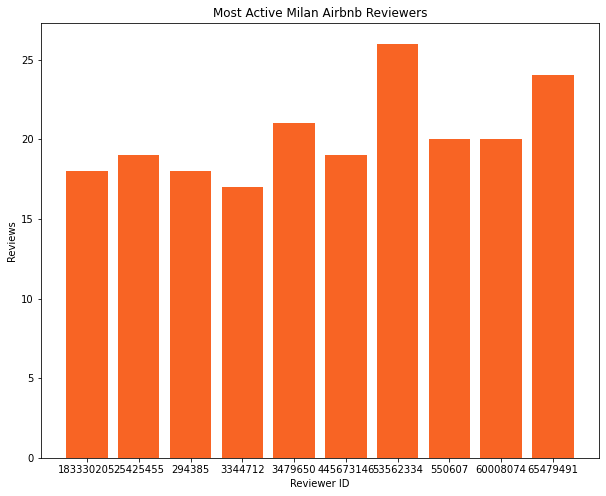

In [176]:
#additional code for graphing with matplot lib incase ploty does not work

#making user_id a string for graphing
top_10_reviewers['reviewer_id'] = top_10_reviewers['reviewer_id'].astype(str)
#making sorted df for chart
top_10_sorted = top_10_reviewers.sort_values('review_count')
#making airbnb_rating a string
grouped = top_10_sorted.groupby("reviewer_id")["review_count"].sum()
fig = plt.figure(figsize = (10, 8))
# create a bar plot
plt.bar(grouped.index, grouped.values, color="#f86424")
# set the x-axis label
plt.xlabel("Reviewer ID")
# set the y-axis label
plt.ylabel("Reviews")
#adding title
plt.title("Most Active Milan Airbnb Reviewers")
# show the plot
plt.show()

In [96]:
#making dataframe of review counts to compare distribution of reviews
top_ratings = pd.DataFrame(english_reviews["rec_scale"].value_counts(ascending=False).head(15))
top_ratings = top_ratings.reset_index()
top_ratings = top_ratings.rename(columns={"rec_scale":"Rec_Count"})
top_ratings = top_ratings.rename(columns={"index":"Rec_Number"})

#making user_id a string for plotting
top_ratings['Rec_Count'] = top_ratings['Rec_Count'].astype(str)
top_ratings

,Rec_Number,Rec_Count
0,10,23392
1,9,9311
2,8,3984
3,7,2933
4,5,1498
5,6,1344
6,1,964
7,4,376
8,3,316
9,2,107


In [144]:
# additional code for graphing with matplot lib incase ploty does not work

#making bar graph of rating frequency
#grouped = top_ratings.groupby("Rec_Number")["Rec_Count"].sum()
#fig = plt.figure(figsize = (10, 8))
# create a bar plot
#plt.bar(grouped.index, grouped.values, color="#f86424")
# set the x-axis label
#plt.xlabel("Rec Number")
# set the y-axis label
#plt.ylabel("Rating Count")
#adding title
#plt.title("Rating Frequency")
# show the plot
#plt.show()

#need to fix this

In [145]:
#using plotly to plot the top reviewers
#fig = px.bar(top_10_sorted, x="reviewer_id", y="review_count")
#fig.update_layout(title_text='Top Reviewers',
               #   title_x=0.5,
               #   xaxis_title="Reviewer ID",
               #   yaxis_title="Review Count",
               #  plot_bgcolor='white')
#fig.update_traces(marker_color = "#f86424")
#fig.show()

In [146]:
#top_ratings.sort_values(by="rating")

## Recommendation System

#### Surprise Data

To make this model, we will be using the scikit tool suprise that uses a range of algorithms made up of matrix factorization-based methods for collaborative filtering. To begin, we are making a new dataframe with just Reviewer ID, rec_scale, and listing ID from our final english reviews dataframe.

In [184]:
from surprise.model_selection import cross_validate
from surprise import Dataset, Reader, accuracy
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline,  SVD, SVDpp, NMF, BaselineOnly, NormalPredictor
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split

In [185]:
#dropping columns that aren't needed for Surprise (since )
surprise_df = english_reviews.drop(columns=["id", "date", "reviewer_name", "comments", "language",
                                    "polarity"])

In [186]:
surprise_df.head()

,listing_id,reviewer_id,rec_scale
1,6400,415910,5
2,6400,415910,4
5,6400,415910,2
6,6400,5023643,1
7,6400,415910,4


In [187]:
#change the order to reviewer, listing id, rec_scale
surprise_df = surprise_df[['reviewer_id', 'listing_id', 'rec_scale']]
surprise_df

,reviewer_id,listing_id,rec_scale
1,415910,6400,5
2,415910,6400,4
5,415910,6400,2
6,5023643,6400,1
7,415910,6400,4
...,...,...,...
611693,157651921,832647024131935906,4
611768,491920050,841111184096419460,3
611782,223990220,843618815888733815,7
611785,35287167,846130517363365733,3


In [188]:
surprise_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45007 entries, 1 to 611800
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   reviewer_id  45007 non-null  int64   
 1   listing_id   45007 non-null  int64   
 2   rec_scale    45007 non-null  category
dtypes: category(1), int64(2)
memory usage: 2.3 MB


In [189]:
surprise_df.isnull().sum()

reviewer_id    0
listing_id     0
rec_scale      0
dtype: int64

In [190]:
#locating the nulls
#surprise_df.loc[surprise_df['rec_scale'].isnull()]

In [139]:
surprise_df.dropna(inplace = True)

<ipython-input-139-e9d5b73e9c02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surprise_df.dropna(inplace = True)


In [191]:
from surprise import Reader, Dataset

reader = Reader(rating_scale=(1, 10))

#loading final dataset
data = Dataset.load_from_df(surprise_df, reader)

#spltting into train and test
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [192]:
#looking at number of users
print('Number of users: ', trainset.n_users, '\n')
print('Number of items: ', trainset.n_items)

Number of users:  18053 

Number of items:  8597


#### Baseline Model


In [193]:
# Instantiate the model
baseline = NormalPredictor()

#fitting model
baseline.fit(trainset)

# making prediction on testset
predictions = baseline.test(testset)

# Save RMSE score
baseline_normal = accuracy.rmse(predictions)

RMSE: 2.5015


In [194]:
baseline_normal

2.501540487795242

Normal Predictor baseline model's RMSE (Root Mean Squared Error) is telling us theat or predicted rating of airbnb recommendors is 2.5 points away from the actual rating. 

#### BaselineOnly
Below running a baseline only to see if can decrease the RMSE

In [196]:
# Instantiate and fit model
baseline_only = BaselineOnly()

#fitting model
baseline_only.fit(trainset)

# making prediction on testset
predictions = baseline_only.test(testset)

# Save RMSE score
baseline_only_rmse = accuracy.rmse(predictions)

Estimating biases using als...
RMSE: 1.7675


We decreased the RMSE somewhat substatially with this baseline only method. Below we will be running a few more complex models to see if we can decrease further. 

### SVD
SVD (Singular Value Decomposition) is used to reduce the dimensionality of our matrix. SVD is a matrix factorization model that decomposes the reviewer reviews and airbnb listings into three matrices. This helps us understand the relationship between users and items.

#### SVD Model 1
In this first model we will be using normal metrics as a base and see how the model runs! 

In [198]:
# Cross validate a basic SVD with no hyperparameter

svd_1 = SVD(random_state=42)

results = cross_validate(svd_1, data, measures=['RMSE'], cv=3, n_jobs = -1, verbose=True)

Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.7851  1.7560  1.7523  1.7645  0.0147  
Fit time          1.60    1.40    1.57    1.52    0.09    
Test time         0.07    0.07    0.06    0.07    0.00    


In [201]:
# Fit to trainset and predict on the testset for evaluation
svd_1.fit(trainset)

predictions = svd_1.test(testset)

svd_1_rmse = accuracy.rmse(predictions)
#do I want to be evaluatiing on the test set already? 

RMSE: 1.7566


The RMSE for the model did decrease, however not by very much. Will keep iterating on models to attempt more accurate predictions.